In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_05 import *

In [3]:
x_train,y_train,x_valid,y_valid = get_data()
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
nh,bs = 50,512
c = y_train.max().item()+1
loss_func = F.cross_entropy

In [4]:
data = DataBunch(*get_dls(train_ds, valid_ds, bs), c)

In [5]:
class Recorder(Callback):
    def begin_fit(self): self.lrs, self.losses = [],[]
        
    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.param_groups[-1]['lr'])
        self.losses.append(self.loss.detach().cpu())
        
    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)

In [6]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy)]

In [7]:
learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

In [8]:
run.fit(3, learn)

train: [0.757663515625, tensor(0.8028)]
valid: [0.374552685546875, tensor(0.8886)]
train: [0.3523428125, tensor(0.8992)]
valid: [0.2976974365234375, tensor(0.9172)]
train: [0.2986360546875, tensor(0.9146)]
valid: [0.261676953125, tensor(0.9268)]


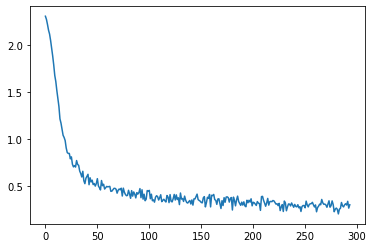

In [9]:
run.recorder.plot_loss()

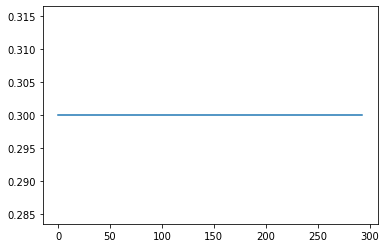

In [10]:
run.recorder.plot_lr()

In [72]:
class ParamScheduler(Callback):
    _order=1
    def __init__(self, pname, sched_func): self.pname,self.sched_func = pname,sched_func

    def set_param(self):
        for pg in self.opt.param_groups:
            pg[self.pname] = self.sched_func(self.n_epochs/self.epochs)
            
    def begin_batch(self): 
        if self.in_train: self.set_param()

In [73]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 

In [74]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

In [75]:
learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

In [76]:
run.fit(1, learn)

train: [0.730693984375, tensor(0.7955)]
valid: [0.307851416015625, tensor(0.9103)]


In [88]:
p = torch.linspace(0.01,0.999,100)
a = torch.arange(0, 100)

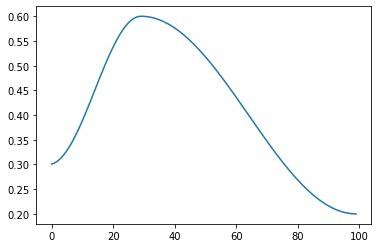

In [89]:
plt.plot(a, [sched(o) for o in p])

In [90]:
schedm = combine_scheds([0.3, 0.7], [sched_cos(0.95, 0.85), sched_cos(0.85, 0.95)]) 

Momentum Scheduling

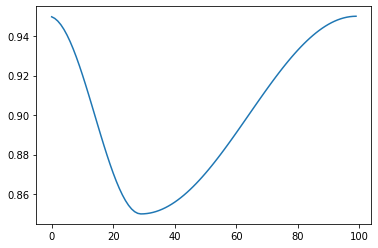

In [92]:
plt.plot(a, [schedm(o) for o in p])

In [107]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(3, learn)

train: [0.78717984375, tensor(0.7758)]
valid: [0.316825830078125, tensor(0.9096)]
train: [0.30987919921875, tensor(0.9087)]
valid: [0.2522117431640625, tensor(0.9255)]
train: [0.243306953125, tensor(0.9304)]
valid: [0.217958740234375, tensor(0.9365)]


In [114]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(1, learn)
run.fit(1, learn)
run.fit(1, learn)

train: [0.733006953125, tensor(0.7941)]
valid: [0.3065153076171875, tensor(0.9137)]
train: [0.322864765625, tensor(0.9054)]
valid: [0.243762744140625, tensor(0.9300)]
train: [0.2490887890625, tensor(0.9283)]
valid: [0.2100059814453125, tensor(0.9408)]


In [97]:
class Recorder(Callback):
    def begin_fit(self): self.lrs, self.losses,self.momentums = [],[],[]
        
    def after_batch(self):
        if not self.in_train: return
        self.lrs.append(self.opt.param_groups[-1]['lr'])
        self.momentums.append(self.opt.param_groups[-1]['momentum'])
        self.losses.append(self.loss.detach().cpu())
        
    def plot_lr  (self): plt.plot(self.lrs)
    def plot_loss(self): plt.plot(self.losses)
    def plot_momentum  (self): plt.plot(self.momentums)

In [98]:
sched = combine_scheds([0.3, 0.7], [sched_cos(0.3, 0.6), sched_cos(0.6, 0.2)]) 
schedm = combine_scheds([0.3, 0.7], [sched_cos(0.95, 0.85), sched_cos(0.85, 0.95)]) 

In [109]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched),
       partial(ParamScheduler, 'momentum', schedm)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(3, learn)

train: [0.5451390234375, tensor(0.8459)]
valid: [0.2158076171875, tensor(0.9389)]
train: [0.1840378515625, tensor(0.9459)]
valid: [0.162330859375, tensor(0.9530)]
train: [0.14373572265625, tensor(0.9573)]
valid: [0.15257650146484375, tensor(0.9566)]


In [110]:
cbfs = [Recorder,
        partial(AvgStatsCallback,accuracy),
        partial(ParamScheduler, 'lr', sched),
       partial(ParamScheduler, 'momentum', schedm)]

learn = create_learner(get_model_func(0.3), loss_func, data)
run = Runner(cb_funcs=cbfs)

run.fit(1, learn)
run.fit(1, learn)
run.fit(1, learn)

train: [0.5417444140625, tensor(0.8480)]
valid: [0.18913790283203125, tensor(0.9432)]
train: [0.18602048828125, tensor(0.9436)]
valid: [0.1507114501953125, tensor(0.9552)]
train: [0.142861796875, tensor(0.9557)]
valid: [0.1319415283203125, tensor(0.9619)]
